In [1]:
from skimage import io, filters, color
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def get_sum_width_and_height_at_median_pixels(filtered_image):
    pixel_value = 0.01
    up_index = -1
    down_index = -1
    left_index = -1
    right_index = -1
    for i in range(len(filtered_image)):
        if filtered_image[i][50] > pixel_value:
            up_index = i
            break
    for i in range(len(filtered_image) - 1, -1, -1):
        if filtered_image[i][50] > pixel_value:
            down_index = i
            break
    for j in range(len(filtered_image)):
        if filtered_image[50][j] > pixel_value:
            left_index = j
            break
    for j in range(len(filtered_image) - 1, -1, -1):
        if filtered_image[50][j] > pixel_value:
            right_index = j
            break
    # print(north_i,south_i,west_j,east_j)
    width_at_median_pixels = abs(right_index - left_index)
    height_at_median_pixels = abs(down_index - up_index)
    sum_width_and_height_at_median_pixels = width_at_median_pixels + height_at_median_pixels
    return sum_width_and_height_at_median_pixels

In [7]:
image = io.imread('/content/drive/MyDrive/Colab Notebooks/lab1/training/banana/0_100.jpg')
image_gray = color.rgb2gray(image)
edges = filters.roberts(image_gray)
print('Значение суммы высоты и ширины обьекта в разрезе 50го пикселя =',
      get_sum_width_and_height_at_median_pixels(edges))
io.imshow(edges)
io.show()

AttributeError: ignored

Значение суммы высоты и ширины обьекта в разрезе 50го пикселя = 193


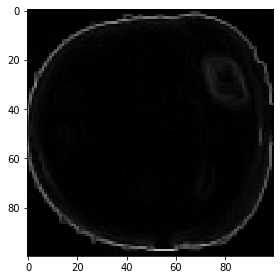

In [ ]:
image = io.imread('/content/drive/MyDrive/Colab Notebooks/lab1/training/tomato maroon/0_100.jpg')
image_gray = color.rgb2gray(image)
edges = filters.roberts(image_gray)
print('Значение суммы высоты и ширины обьекта в разрезе 50го пикселя =',
      get_sum_width_and_height_at_median_pixels(edges))
io.imshow(edges)
io.show()

In [ ]:
x_train_banana = []
x_train_tomato = []
x_test_list = []
y_test_list = []

In [ ]:
def create_train_and_test_arrays_with_sum_vals(dir_path, is_testing=False):
    if 'banana' in dir_path:
        y_value = 0  # banana
    else:
        y_value = 1  # tomato

    for image_name in os.listdir(dir_path):
        if image_name.endswith('jpg'):
            image_path = dir_path + '/' + image_name
            img = io.imread(image_path)
            img_gray = color.rgb2gray(img)  # Переводим изображение в полутоновый формат
            img_edges = filters.sobel(img_gray)  # Выделяем контур/границы объекта
            sum_width_and_height = get_sum_width_and_height_at_median_pixels(img_edges)
            if is_testing:
                x_test_list.append(sum_width_and_height)
                y_test_list.append(y_value)
            else:
                if y_value == 0:
                    x_train_banana.append(sum_width_and_height)
                else:
                    x_train_tomato.append(sum_width_and_height)

In [ ]:
create_train_and_test_arrays_with_sum_vals("/content/drive/MyDrive/Colab Notebooks/lab1/training/banana/")
create_train_and_test_arrays_with_sum_vals("/content/drive/MyDrive/Colab Notebooks/lab1/training/tomato maroon/")

In [ ]:
tomato_max_val = max(x for x in x_train_tomato)
tomato_min_val = min(x for x in x_train_tomato)
banana_max_val = max(x for x in x_train_banana)
banana_min_val = min(x for x in x_train_banana)

print('\nМаксимальное число в тренировочной выборке tomato:', tomato_max_val)
print('Минимальное число в тренировочной выборке tomato:', tomato_min_val)
print('\nМаксимальное число в тренировочной выборке banana:', banana_max_val)
print('Минимальное число в тренировочной выборке banana:', banana_min_val)

class_value = banana_max_val + (tomato_min_val - banana_max_val) / 2
print('Возьмем за пороговое значение число ', class_value)


Максимальное число в тренировочной выборке tomato: 198
Минимальное число в тренировочной выборке tomato: 102

Максимальное число в тренировочной выборке banana: 168
Минимальное число в тренировочной выборке banana: 63
Возьмем за пороговое значение число  135.0


In [ ]:
create_train_and_test_arrays_with_sum_vals("/content/drive/MyDrive/Colab Notebooks/lab1/testing/banana", is_testing=True)
create_train_and_test_arrays_with_sum_vals("/content/drive/MyDrive/Colab Notebooks/lab1/testing/tomato_maroon/", is_testing=True)

In [ ]:
def predict_by_sum_width_and_height_50_pixel(x_test_deltas, value):
    y_pred_by_sum = []
    for x in x_test_deltas:
        if x < value:
            y_pred_by_sum.append(0)  # banana
        else:
            y_pred_by_sum.append(1)  # tomato
    return y_pred_by_sum

In [ ]:
y_pred = predict_by_sum_width_and_height_50_pixel(x_test_list, class_value)

In [ ]:
equal_vals = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test_list[i]:
        equal_vals += 1
accuracy = 100 * equal_vals / len(y_pred)
print('Точность распознавания обьектов в тестовом наборе данных:', accuracy, '%')

Точность распознавания обьектов в тестовом наборе данных: 89.07849829351535 %
